## **1.Haris-Corner Detection**
- Works on grayscale images

### **1. Load image & convert to greyscale image**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image

img = cv2.imread('cv15.jpg')
grey=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32 (for precision)

grey=np.float32(grey)

### **2. Compute Gradients lx & ly values**

In [3]:
# <!-- Compute gradients using sobel operator -->
ix=cv2.Sobel(grey, cv2.CV_64F,1,0,ksize=3)
iy=cv2.Sobel(grey, cv2.CV_64F,0,1,ksize=3)

### **3. Compute Product of gradients**

In [4]:
ixx=ix**2
iyy=iy**2
ixy=ix*iy

### **4. Apply Gaussian Blurring/Smoothing**

In [5]:
ixx=cv2.GaussianBlur(ixx,(3,3),1)
iyy=cv2.GaussianBlur(iyy,(3,3),1)
ixy=cv2.GaussianBlur(ixy,(3,3),1)

### **5. Compute Harris Response R**

In [6]:
k=0.04
det_M=(ixx*iyy)-(ixy**2)
trace_M=ixx+iyy
R=det_M - k*(trace_M**2)


### **6. Threshold & mark corners**

In [7]:
# Normalize R to range (0-255)
R_norm=cv2.normalize(R,None, 0,255,cv2.NORM_MINMAX)
R_norm=np.uint8(R_norm)

threshold=0.01*R.max()
img[R>threshold]=[0,0,255]


### **7. Show Results**

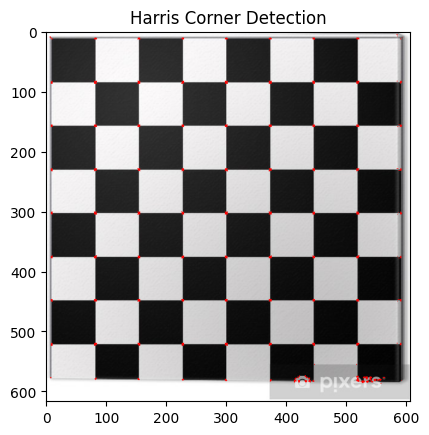

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.show()

### **With Use of Function**

In [9]:
img = cv2.imread('cv13.jpg')
grey=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
# Apply harris corner detection
dst=cv2.cornerHarris(grey,blockSize=2,ksize=3,k=15)

In [11]:
# Mark Corners
img[dst>0.01*dst.max()]=[0,0,255]

In [12]:
dst>0.01 * dst.max()

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

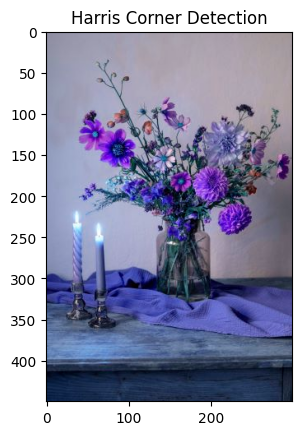

In [13]:
plt.imshow(img)
plt.title('Harris Corner Detection')
plt.show()


## **2. Shi-Tomasi Corner Detection**
- Improved version of harris corner detection
- Detecting good feature points(corner)

In [42]:
img = cv2.imread('cv16.jpg')
grey=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [43]:
# Apply Shi-Tomasi Corner Detection

corners=cv2.goodFeaturesToTrack(grey,maxCorners=50,qualityLevel=0.01,minDistance=10)

In [44]:
# Corners in int

corners=np.int32(corners)

In [45]:
# Loop for all points

for i in corners:
    x,y=i.ravel()
    cv2.circle(img,(x,y),5,(0,255,0))

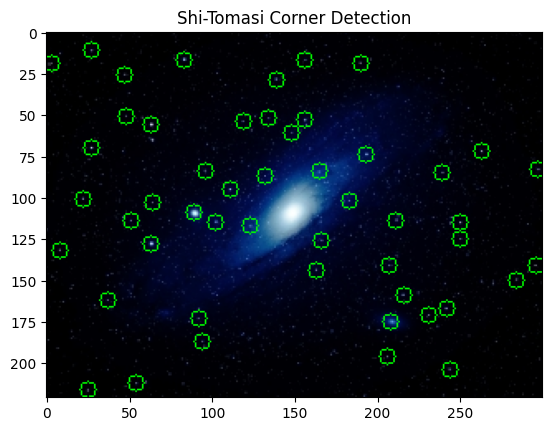

In [46]:
# Display the results

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.show()
